<a href="https://colab.research.google.com/github/kotarohamachi/kotarohamachi/blob/main/GrowthAccounting_py_ipynb_%E3%81%AE%E3%82%B3%E3%83%94%E3%83%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-2-9a40c5e96c2b>:22: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  data = data.sort_values('year').groupby('countrycode').apply(lambda x: x.assign(


    year countrycode     rgdpna      rkna        pop        emp          avh  \
24  2019         FRA  2965338.5  1.044841  67.351247  28.532564  1504.912353   

       labsh    rtfpna     alpha           y_n         hours  tfp_term  \
24  0.624132  0.994386  0.375868  103928.21875  42939.008267   0.99102   

    cap_term   lab_term  y_n_shifted  tfp_term_shifted  cap_term_shifted  \
24   0.00013  637.53843   122.020233        103.703377         128.39415   

    lab_term_shifted  
24        100.149533  


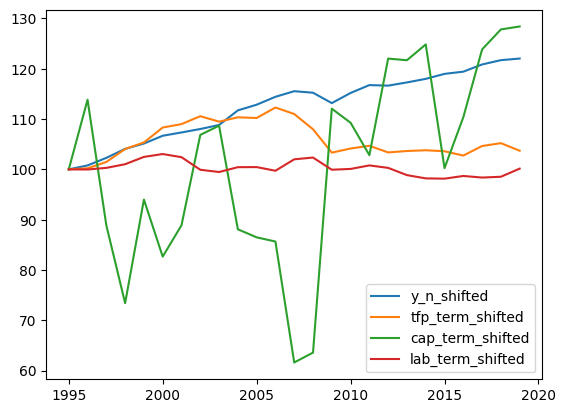

In [2]:
import pandas as pd
import matplotlib.pyplot as plt


# Load data
pwt1001 = pd.read_stata('https://dataverse.nl/api/access/datafile/354098')

# Filter and select relevant columns
data = pwt1001.loc[pwt1001['country'].isin(['France'])][['year', 'countrycode', 'rgdpna', 'rkna', 'pop', 'emp', 'avh', 'labsh', 'rtfpna']]
data = data.loc[(data['year'] >= 1995) & (data['year'] <= 2019)].dropna()

# Calculate additional variables
data['alpha'] = 1 - data['labsh']
data['y_n'] = data['rgdpna'] / data['emp']  # Y/N
data['hours'] = data['emp'] * data['avh']  # L
data['tfp_term'] = data['rtfpna'] ** (1 / (1 - data['alpha']))  # A^(1/(1-alpha))
data['cap_term'] = (data['rkna'] *11636817/0.947249829769135/ data['rgdpna']) ** (data['alpha'] / (1 - data['alpha']))  # (K/Y)^(alpha/(1-alpha))
data['lab_term'] = data['hours'] / data['pop']  # L/N
data = data.sort_values('year').groupby('countrycode').apply(lambda x: x.assign(
    alpha=1 - x['labsh'],
    y_n_shifted=100 * x['y_n'] / x['y_n'].iloc[0],
    tfp_term_shifted=100 * x['tfp_term'] / x['tfp_term'].iloc[0],
    cap_term_shifted=100 * x['cap_term'] / x['cap_term'].iloc[0],
    lab_term_shifted=100 * x['lab_term'] / x['lab_term'].iloc[0]
)).reset_index(drop=True).dropna()

# Print first 10 rows of data
print(data.tail(1))

# Plot data
plt.plot(data['year'], data['y_n_shifted'], label='y_n_shifted')
plt.plot(data['year'], data['tfp_term_shifted'], label='tfp_term_shifted')
plt.plot(data['year'], data['cap_term_shifted'], label='cap_term_shifted')
plt.plot(data['year'], data['lab_term_shifted'], label='lab_term_shifted')
plt.legend()
plt.show()

import pandas as pd
import matplotlib.pyplot as plt


# Load data
pwt1001 = pd.read_stata('https://dataverse.nl/api/access/datafile/354098')

# Filter and select relevant columns
data = pwt1001.loc[pwt1001['country'].isin(['Germany'])][['year', 'countrycode', 'rgdpna', 'rkna', 'pop', 'emp', 'avh', 'labsh', 'rtfpna']]
data = data.loc[(data['year'] >= 1995) & (data['year'] <= 2019)].dropna()

# Calculate additional variables
data['alpha'] = 1 - data['labsh']
data['y_n'] = data['rgdpna'] / data['emp']  # Y/N
data['hours'] = data['emp'] * data['avh']  # L
data['tfp_term'] = data['rtfpna'] ** (1 / (1 - data['alpha']))  # A^(1/(1-alpha))
data['cap_term'] = (data['rkna'] *11636817/0.947249829769135/ data['rgdpna']) ** (data['alpha'] / (1 - data['alpha']))  # (K/Y)^(alpha/(1-alpha))
data['lab_term'] = data['hours'] / data['pop']  # L/N
data = data.sort_values('year').groupby('countrycode').apply(lambda x: x.assign(
    alpha=1 - x['labsh'],
    y_n_shifted=100 * x['y_n'] / x['y_n'].iloc[0],
    tfp_term_shifted=100 * x['tfp_term'] / x['tfp_term'].iloc[0],
    cap_term_shifted=100 * x['cap_term'] / x['cap_term'].iloc[0],
    lab_term_shifted=100 * x['lab_term'] / x['lab_term'].iloc[0]
)).reset_index(drop=True).dropna()

# Print first 10 rows of data
print(data.tail(1))

# Plot data
plt.plot(data['year'], data['y_n_shifted'], label='y_n_shifted')
plt.plot(data['year'], data['tfp_term_shifted'], label='tfp_term_shifted')
plt.plot(data['year'], data['cap_term_shifted'], label='cap_term_shifted')
plt.plot(data['year'], data['lab_term_shifted'], label='lab_term_shifted')
plt.legend()
plt.show()

import pandas as pd
import matplotlib.pyplot as plt


# Load data
pwt1001 = pd.read_stata('https://dataverse.nl/api/access/datafile/354098')

# Filter and select relevant columns
data = pwt1001.loc[pwt1001['country'].isin(['Germany'])][['year', 'countrycode', 'rgdpna', 'rkna', 'pop', 'emp', 'avh', 'labsh', 'rtfpna']]
data = data.loc[(data['year'] >= 1995) & (data['year'] <= 2019)].dropna()

# Calculate additional variables
data['alpha'] = 1 - data['labsh']
data['y_n'] = data['rgdpna'] / data['emp']  # Y/N
data['hours'] = data['emp'] * data['avh']  # L
data['tfp_term'] = data['rtfpna'] ** (1 / (1 - data['alpha']))  # A^(1/(1-alpha))
data['cap_term'] = (data['rkna'] *11636817/0.947249829769135/ data['rgdpna']) ** (data['alpha'] / (1 - data['alpha']))  # (K/Y)^(alpha/(1-alpha))
data['lab_term'] = data['hours'] / data['pop']  # L/N
data = data.sort_values('year').groupby('countrycode').apply(lambda x: x.assign(
    alpha=1 - x['labsh'],
    y_n_shifted=100 * x['y_n'] / x['y_n'].iloc[0],
    tfp_term_shifted=100 * x['tfp_term'] / x['tfp_term'].iloc[0],
    cap_term_shifted=100 * x['cap_term'] / x['cap_term'].iloc[0],
    lab_term_shifted=100 * x['lab_term'] / x['lab_term'].iloc[0]
)).reset_index(drop=True).dropna()

# Print first 10 rows of data
print(data.tail(1))

# Plot data
plt.plot(data['year'], data['y_n_shifted'], label='y_n_shifted')
plt.plot(data['year'], data['tfp_term_shifted'], label='tfp_term_shifted')
plt.plot(data['year'], data['cap_term_shifted'], label='cap_term_shifted')
plt.plot(data['year'], data['lab_term_shifted'], label='lab_term_shifted')
plt.legend()
plt.show()